In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import make_regression  #importing a regression dataset

In [3]:
x,y=make_regression(n_samples=500,n_features=1,bias=10,noise=15)   #bias=shift from 0 noise the amount of data is spred
print(x.shape)
print(y.shape)

(500, 1)
(500,)


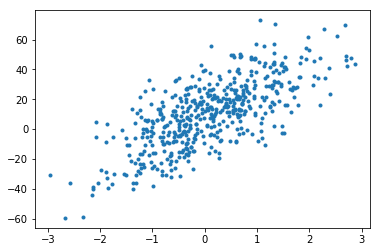

In [4]:
plt.plot(x,y,'.')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 1)
(125, 1)
(375,)
(125,)


In [6]:
def hypothesis(x,W):    #weight vector
    x0=1
    x1=x
    h=W[0]+W[1]*x1
    return h

In [7]:
def get_error(X,W,y_true):    #X is a vector uppercase->vector  #y_treu vector of true value
    err=0.0
    m=X.shape[0]
    for i in range(m):
        err+=(hypothesis(X[i],W)-y_true[i])**2
    err/=2*m;
    return err

In [8]:
def gradient_descent(X,W,y_true,learning_rate=0.1): 
    m=X.shape[0]
    grad0=0.0
    grad1=0.0
    for i in range(m):
        grad0+=(y_true[i]-hypothesis(X[i],W))*learning_rate
        grad1+=(y_true[i]-hypothesis(X[i],W))*X[i]*learning_rate
    grad0/=m
    grad1/=m
    W[0]+=grad0
    W[1]+=grad1   
    err=get_error(X,W,y_true)
    return W,err            
    

In [9]:
W=np.array([0.1,0.1])
loss=[]
for i in range(400):
    W,err=gradient_descent(X_train,W,y_train,learning_rate=0.1)
    loss.append(err)
print(W)    

[ 8.96605599 15.91420647]


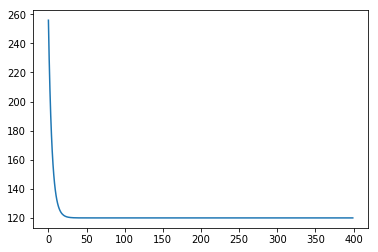

In [10]:
plt.plot(loss)
plt.show()

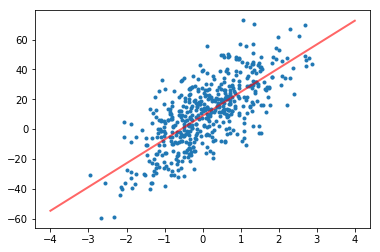

In [11]:
plt.plot(x,y,'.')
x_hyp=np.arange(-4,5)
y_hyp=W[0]+W[1]*x_hyp
plt.plot(x_hyp,y_hyp,'r',lw=2,alpha=0.6)

In [12]:
#Stochastic Gradient Descent

In [13]:
def stochastic_gradient_descent(X,W,y_true,learning_rate=0.1):
    m=X.shape[0]
    loss=[]
    for i in range(m):
        grad0=(y_true[i]-hypothesis(X[i],W))
        grad1=(y_true[i]-hypothesis(X[i],W))*X[i]
        W[0]+=learning_rate*grad0
        W[1]+=learning_rate*grad1
        err=get_error(X,W,y_true)
        loss.append(err)
    return W,loss    

In [14]:
W=np.array([0.1,0.1])
W,loss=stochastic_gradient_descent(X_train,W,y_train,learning_rate=0.1)
print(W)

[ 0.76554782 20.33799382]


Text(0.5,1,'Loss for Stochastic Gradient Descent')

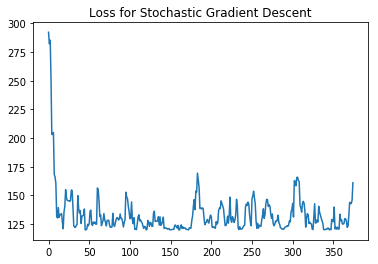

In [15]:
plt.plot(loss)
plt.title('Loss for Stochastic Gradient Descent')

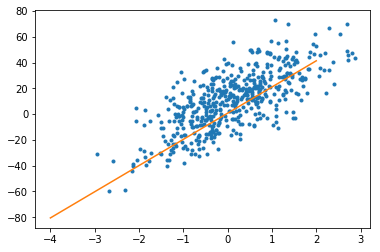

In [16]:
plt.plot(x,y,'.')
plt.plot(np.arange(-4,3),(W[0]+W[1]*np.arange(-4,3)))

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [18]:
lr.score(X_test,y_test)*100

51.28953302124142

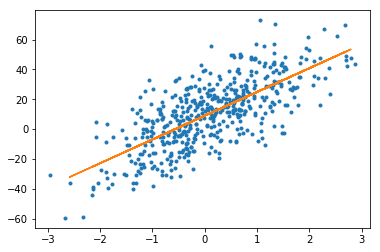

In [19]:
plt.plot(x,y,'.')
plt.plot(X_test,pred)

In [20]:
lr.coef_ #returns W[1:]

array([15.91420647])

In [21]:
lr.intercept_   #returns W[0]

8.966055993650187

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error()